# Práctica 1 #

## Imports ##

In [ ]:
%%time

# Importar librerias
import sys
import os
import pathlib
import math
import numpy as np; print(f'Versión de Numpy: {np.__version__}')
import pandas as pd; print(f'Versión de Pandas: {pd.__version__}')
import matplotlib as mpl; print(f'Versión de MatPlotLib: {mpl.__version__}')
import sklearn as sk; print(f'Versión de ScikitLearn: {sk.__version__}')
import tensorflow as tf; #print(f'Versión de TensorFlow: {tf.__version__}')
import tensorflow.python.keras as tfk; #print(f'Versión de Keras: {tfk.__version__}')
import google.colab as gc; print(f'Version de Google Colab: {gc.__version__}')

# Importar funciones
from pathlib import Path
from math import ceil
from numpy import abs, logical_and, nan
from pandas import read_csv, DataFrame, get_dummies
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

Versión de Numpy: 1.23.5
Versión de Pandas: 1.5.3
Versión de MatPlotLib: 3.7.1
Versión de ScikitLearn: 1.2.2
Version de Google Colab: 0.0.1a2
CPU times: user 5.35 s, sys: 437 ms, total: 5.79 s
Wall time: 9.94 s


## Data ##

### Read dataset ###

In [ ]:
%%time

# Leer el conjunto de datos
dataset = pd.read_csv('student-mat.csv', sep=';', decimal='.')

# Verificar la lectura correcta
print(dataset.info())

# Estadísticas resumidas
print(dataset.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### Exploratory Data Analysis (EDA) ###

### Data pre-processing ###

In [ ]:
%%time

#Borrar valores faltantes
dataset = dataset.dropna()

CPU times: user 4.24 ms, sys: 26 µs, total: 4.26 ms
Wall time: 4.23 ms


Tras la comprobación de que no falta ningún valor, podemos continuar con el preprocesamiento de datos

In [ ]:
# Separa las características (X) de las etiquetas objetivo (y)
X=dataset.drop(columns=['G3'])  # X contiene todas las características
Y=dataset[['G3']]  # y contiene las etiquetas objetivo

# Ahora, X contiene tus características y y contiene las etiquetas objetivo
print(X)
print(Y)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... romantic famrel  freetime  goout  Dalc Wal

In [ ]:
columnas_categoricas=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'higher',  'internet',  'romantic', 'activities', 'nursery', 'reason']

# Aplicar One-Hot Encoding - Entrena mejor con ellos
X_OH=pd.get_dummies(X, columns=columnas_categoricas)

# Pasar a float
X_OH = X_OH.astype(float)

# Imprimir información sobre el DataFrame después de la conversión
print(X_OH)

      age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0    18.0   4.0   4.0         2.0        2.0       0.0     4.0       3.0   
1    17.0   1.0   1.0         1.0        2.0       0.0     5.0       3.0   
2    15.0   1.0   1.0         1.0        2.0       3.0     4.0       3.0   
3    15.0   4.0   2.0         1.0        3.0       0.0     3.0       2.0   
4    16.0   3.0   3.0         1.0        2.0       0.0     4.0       3.0   
..    ...   ...   ...         ...        ...       ...     ...       ...   
390  20.0   2.0   2.0         1.0        2.0       2.0     5.0       5.0   
391  17.0   3.0   1.0         2.0        1.0       0.0     2.0       4.0   
392  21.0   1.0   1.0         1.0        1.0       3.0     5.0       5.0   
393  18.0   3.0   2.0         3.0        1.0       0.0     4.0       4.0   
394  19.0   1.0   1.0         1.0        1.0       0.0     3.0       2.0   

     goout  Dalc  ...  romantic_no  romantic_yes  activities_no  \
0      4.0   1.0  ..

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del escalador
scaler=MinMaxScaler()

# Aplicar la normalización Min-Max a todas las características
X_OHnormalized=scaler.fit_transform(X_OH)

# Crear un nuevo DataFrame con las características normalizadas
X_OHnormalized_df=pd.DataFrame(X_OHnormalized, columns=X_OH.columns)

# Visualizar el DataFrame que se va a utilizar para el entrenamiento de los modelos
print(X_OHnormalized_df)

          age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
0    0.428571  1.00  1.00    0.333333   0.333333  0.000000    0.75      0.50   
1    0.285714  0.25  0.25    0.000000   0.333333  0.000000    1.00      0.50   
2    0.000000  0.25  0.25    0.000000   0.333333  1.000000    0.75      0.50   
3    0.000000  1.00  0.50    0.000000   0.666667  0.000000    0.50      0.25   
4    0.142857  0.75  0.75    0.000000   0.333333  0.000000    0.75      0.50   
..        ...   ...   ...         ...        ...       ...     ...       ...   
390  0.714286  0.50  0.50    0.000000   0.333333  0.666667    1.00      1.00   
391  0.285714  0.75  0.25    0.333333   0.000000  0.000000    0.25      0.75   
392  0.857143  0.25  0.25    0.000000   0.000000  1.000000    1.00      1.00   
393  0.428571  0.75  0.50    0.666667   0.000000  0.000000    0.75      0.75   
394  0.571429  0.25  0.25    0.000000   0.000000  0.000000    0.50      0.25   

     goout  Dalc  ...  romantic_no  rom

### Save cleaned dataset ###

In [ ]:
# Crear un nuevo DataFrame con las características seleccionadas
X_OHselected=X_OHnormalized_df

# Guardar el nuevo DataFrame en un archivo CSV
X_OHselected.to_csv("datos_con_selected_features.csv", index=False)

# Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

y = Y['G3']

X_train, X_test, y_train, y_test=train_test_split(X_OHselected, y, test_size=0.1, random_state=4)

#from scipy.stats import zscore

# Calcular Z-score para la variable objetivo
#z_scores=zscore(y_train)

# Definir un umbral
#threshold=3 # Están más cerca a la media para ser considerados atipicos

# Filtrar valores atípicos en el conjunto de entrenamiento
#filtered_indices=np.where(np.abs(z_scores) < threshold)[0]
#X_train_filtered=X_train.iloc[filtered_indices]
#y_train_filtered=y_train.iloc[filtered_indices]

# Imprimir información sobre valores atípicos eliminados
#outliers_removed=len(y_train) - len(y_train_filtered)
#print(f'Valores atípicos eliminados: {outliers_removed}')

#X_train = X_train_filtered
#y_train = y_train_filtered

## Artificial Intelligence (AI) ##

### Machine Learning (ML) ###

#### Model ####

Score del modelo:  0.898006533412095
Puntajes de Validación Cruzada: [0.91099696 0.90986452 0.8703027  0.82452231 0.80777071]
Puntaje promedio de Validación Cruzada: 0.8646914414530912
Model predictions


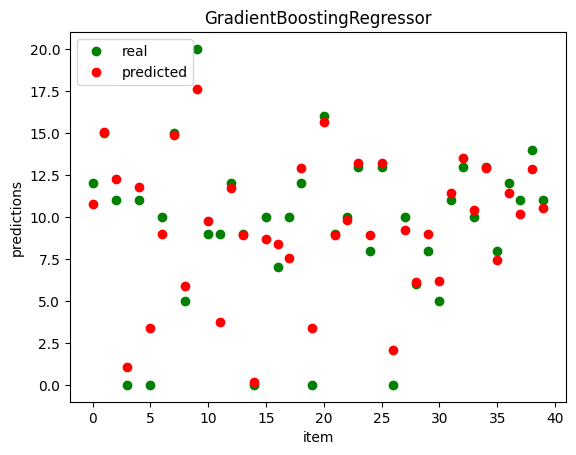

RMSE: 1.4616799038606705
MSE: 2.136508141350139
R2: 0.898006533412095
MAPE: inf%


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt

# Tasa de aprendizaje
learning_rate=0.1

# Número máximo de estimadores
n_estimators=500

# Configurar la detención temprana
n_iter_no_learning=15  # Número de etapas sin mejora antes de detenerse #15

modelo = GradientBoostingRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=2,
    random_state=50, #40
    n_iter_no_change=n_iter_no_learning,  # Detención temprana
    validation_fraction=0.1  # Fracción del conjunto de entrenamiento utilizada para validación
)

modelo.fit(X_train, y_train)

resultado=modelo.score(X_test, y_test)
print("Score del modelo: ", resultado)

scores=cross_val_score(modelo, X_train, y_train, cv=5)  # 5 pliegues de validación cruzada
print("Puntajes de Validación Cruzada:", scores)
print("Puntaje promedio de Validación Cruzada:", scores.mean())


y_pred = modelo.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
APE=np.abs((y_test - y_pred) / y_test) * 100
MAPE=np.mean(APE)
RMSEGBR=math.sqrt(MSE)

# Representar las predictiones
print('Model predictions')
plt.plot(y_test.values, 'go')
plt.plot(y_pred.flatten(), 'ro')
plt.title('GradientBoostingRegressor')
plt.ylabel('predictions')
plt.xlabel('item')
plt.legend(['real', 'predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSEGBR}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")

### **XGBRegressor**

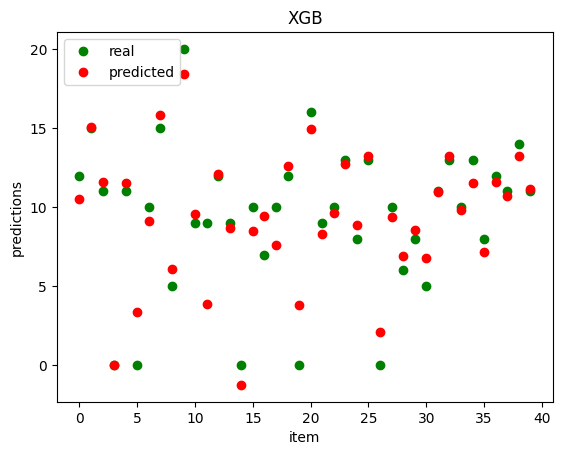

RMSE: 3.858634797438078
MSE: 2.304811192071736
R2: 0.8899720161321525
MAPE: inf%


In [ ]:
from xgboost import XGBRegressor

# Entrenar el modelo
model_xgb = XGBRegressor(
    learning_rate=0.1,      # Tasa de aprendizaje
    n_estimators=300,       # Número de árboles
    max_depth=2,            # Profundidad máxima de cada árbol
    subsample=0.6,          # Fracción de instancias utilizadas para entrenar cada árbol
    colsample_bytree=0.8,   # Fracción de características utilizadas para entrenar cada árbol
    reg_alpha=0,            # Regularización L1
    reg_lambda=1            # Regularización L2
)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)

# Calcula métricas de evaluación
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
APE = np.abs((y_test - y_pred) / y_test) * 100
MAPE = np.mean(APE)
RMSEXGBR = np.sqrt(MSE)

# Representa las predicciones
plt.plot(y_test.values, 'go')
plt.plot(y_pred, 'ro')
plt.title('XGB')
plt.ylabel('predictions')
plt.xlabel('item')
plt.legend(['real', 'predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSEKNN}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")

### **KNN**

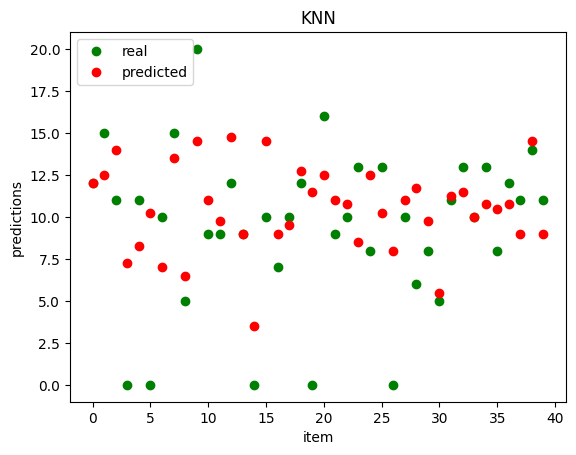

RMSE: 3.858634797438078
MSE: 14.8890625
R2: 0.2892200739945101
MAPE: inf%


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Crea un modelo KNN
modeloKNN=KNeighborsRegressor(n_neighbors=4, weights='uniform', metric='manhattan', p=2)
modeloKNN.fit(X_train, y_train)

# Realiza predicciones en los datos de prueba
y_pred=modeloKNN.predict(X_test)

# Calcula métricas de evaluación
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
APE = np.abs((y_test - y_pred) / y_test) * 100
MAPE = np.mean(APE)
RMSEKNN = np.sqrt(MSE)

# Representa las predicciones
plt.plot(y_test.values, 'go')
plt.plot(y_pred, 'ro')
plt.title('KNN')
plt.ylabel('predictions')
plt.xlabel('item')
plt.legend(['real', 'predicted'], loc='upper left')
plt.show()

print(f"RMSE: {RMSEKNN}")
print(f"MSE: {MSE}")
print(f"R2: {R2}")
print(f"MAPE: {MAPE}%")


#### Hyperparametrization ####

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir hiperparámetros
param_dist = {
    'n_estimators': [10, 30, 60, 250, 400, 1000],  # Número de estimadores
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.12],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7, 9, 15],  # Profundidad máxima de los árboles de decisión
    'min_samples_split': [2, 5, 10, 5],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 3],  # Número mínimo de muestras requeridas en un nodo hoja
}

# Configurar el estimador
gb=GradientBoostingRegressor()

# Crear un objeto RandomizedSearchCV
random_search=RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros y el modelo ajustado
best_params=random_search.best_params_
best_model=random_search.best_estimator_

# Realizar predicciones
y_pred=best_model.predict(X_test)

# Calcular métricas de rendimiento
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)
RMSEGBRH=np.sqrt(MSE)

# Mostrar los resultados
print("Mejores hiperparámetros:", best_params)
print(f"RMSE: {RMSEGBRH}")
print(f"R2: {R2}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores hiperparámetros: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 9, 'learning_rate': 0.3}
RMSE: 1.7759520489352396
R2: 0.8494328354162894


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir hiperparámetros
param_dist = {
    'n_estimators': [10, 30, 60, 250, 400],  # Número de árboles
    'max_features': ['auto', 'sqrt', 'log2'],  # Número máximo de características a considerar en cada división
    'max_depth': [None, 10, 20, 30, 40, 50],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en un nodo hoja
}

# Configurar el estimador (RandomForestRegressor)
rf=RandomForestRegressor()

# Crear un objeto RandomizedSearchCV
random_search=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=1000, cv=5, n_jobs=-1, verbose=2)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener la mejor combinación de hiperparámetros y el modelo ajustado
best_params=random_search.best_params_
best_model=random_search.best_estimator_

# Realizar predicciones con el mejor modelo en los datos de prueba
y_pred=best_model.predict(X_test)

# Calcular métricas de rendimiento
MSE=mean_squared_error(y_test, y_pred)
R2=r2_score(y_test, y_pred)

# Mostrar los resultados
print("Mejores hiperparámetros:", best_params)
print(f"RMSE: {np.sqrt(MSE)}")
print(f"R2: {R2}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 810 is smaller than n_iter=1000. Running 810 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Mejores hiperparámetros: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}
RMSE: 1.5677294483071833
R2: 0.8826697399169569


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
# Optimización con Optuna - Librería de Python
!pip install optuna
import optuna
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from contextlib import redirect_stdout, redirect_stderr
from io import StringIO

# Definir la función para la optimización de hiperparámetros
def objective(trial):
    # Definir los rangos de búsqueda
    n_estimators=trial.suggest_int('n_estimators', 10, 300)
    max_depth=trial.suggest_int('max_depth', 2, 32)
    min_samples_split=trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf=trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    # Crear un modelo RandomForestRegressor con los hiperparámetros sugeridos
    modeloOP = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    #print(y_train.info())

    # Entrena el modelo y calcula el error cuadrático medio (MSE)
    modeloOP.fit(X_train, y_train)
    y_pred=modeloOP.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)

    return mse

# Inicializa el estudio Optuna
sstudy=optuna.create_study(direction='minimize')

# Deshabilita la salida estándar y de error estándar
with redirect_stdout(StringIO()) as stdout, redirect_stderr(StringIO()) as stderr:
    # Ejecuta la optimización de hiperparámetros
    sstudy.optimize(objective, n_trials=100)

# Obtiene los mejores hiperparámetros
best_params=sstudy.best_params

print("Mejores hiperparámetros:", best_params)


[I 2023-12-11 22:22:54,782] A new study created in memory with name: no-name-d84a8a06-7010-4a22-b58b-71b16390a3bc
[I 2023-12-11 22:22:55,096] Trial 0 finished with value: 22.0980332032886 and parameters: {'n_estimators': 75, 'max_depth': 9, 'min_samples_split': 0.6779792767454667, 'min_samples_leaf': 0.20483249983989826}. Best is trial 0 with value: 22.0980332032886.
[I 2023-12-11 22:22:55,469] Trial 1 finished with value: 22.084146369661525 and parameters: {'n_estimators': 127, 'max_depth': 3, 'min_samples_split': 0.7355019193417554, 'min_samples_leaf': 0.3964201481214692}. Best is trial 1 with value: 22.084146369661525.
[I 2023-12-11 22:22:56,251] Trial 2 finished with value: 9.79797284347297 and parameters: {'n_estimators': 213, 'max_depth': 6, 'min_samples_split': 0.5510797823471202, 'min_samples_leaf': 0.2175819684791522}. Best is trial 2 with value: 9.79797284347297.
[I 2023-12-11 22:22:56,482] Trial 3 finished with value: 4.833931694127225 and parameters: {'n_estimators': 41, 'm

Mejores hiperparámetros: {'n_estimators': 88, 'max_depth': 27, 'min_samples_split': 0.10008060115354443, 'min_samples_leaf': 0.10038715989558142}
